# Q 3-6

In [71]:
# ## Problems

import numpy as np
import numpy.fft as fp
from scipy import signal
import scipy.fftpack
from skimage.io import imread
from skimage.color import rgb2gray 
from skimage.metrics import peak_signal_noise_ratio
from scipy.ndimage import convolve
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [72]:
def dft2(im):
    
    freq = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
    freq_shift = np.fft.fftshift(freq)
    mag, phase = freq_shift[:,:,0], freq_shift[:,:,1]

    return mag + 1j*phase

def idft2(freq):
    
    real, imag = freq.real, freq.imag
    back = cv2.merge([real, imag]) 
    back_ishift = np.fft.ifftshift(back)
    im = cv2.idft(back_ishift, flags=cv2.DFT_SCALE)
    im = cv2.magnitude(im[:,:,0], im[:,:,1])

    return im

def ideal_low(sz, D0):
    h, w = sz
    u, v = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) #, sparse=True)
    return np.sqrt(u**2 + v**2) < D0

def butterworth_low(sz, D0, n=1):
    h, w = sz
    u, v = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) #, sparse=True)
    return 1 / (1 + ((0.01+np.sqrt(u**2 + v**2))/D0)**(2*n))

def plot_LPF(im, f, D0s):
    freq = dft2(im) 
    fig = plt.figure(figsize=(20,20))
    plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
    i = 1
    for D0 in D0s:
        freq_kernel = f(im.shape, D0) 
        convolved = freq*freq_kernel # by the Convolution theorem
        im_convolved = idft2(convolved).real 
        im_convolved = (255 * im_convolved / np.max(im_convolved)).astype(np.uint8)
        plt.subplot(2,2,i)
        last_axes = plt.gca()
        img = plt.imshow((20*np.log10(0.01 + freq_kernel)).astype(int), cmap='coolwarm')
        divider = make_axes_locatable(img.axes)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img, cax=cax)
        plt.sca(last_axes), plt.title('{} LPF Kernel (freq)'.format(f.__name__), size=20)
        plt.subplot(2,2,i+2), plt.imshow(im_convolved), plt.axis('off')
        plt.title(r'output with {} LPF ($D_0$={})'.format(f.__name__, D0), size=20)
        i += 1
    plt.show()

def plot_LPF_3d(im, f, D0s):
    freq = dft2(im) 
    fig = plt.figure(figsize=(20,10))
    plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
    i = 1
    for D0 in D0s:
        freq_kernel = f(im.shape, D0) 
        convolved = freq*freq_kernel # by the Convolution theorem
        Y = np.arange(freq_kernel.shape[0]) 
        X = np.arange(freq_kernel.shape[1]) 
        X, Y = np.meshgrid(X, Y)
        Z = (20*np.log10( 0.01 + convolved)).real
        ax = fig.add_subplot(1, 2, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
        ax.zaxis.set_major_locator(LinearLocator(10)), ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        ax.set_xlabel('F1', size=30), ax.set_ylabel('F2', size=30)
        plt.title(r'output with {} LPF (freq)'.format(f.__name__, D0), size=20)
        fig.colorbar(surf, shrink=0.5, aspect=10)
        i += 1
    plt.show()

def plot_filter_3d(sz, f, D0s, cmap=plt.cm.coolwarm):
    fig = plt.figure(figsize=(20,10))
    plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
    i = 1
    for D0 in D0s:
        freq_kernel = f(sz, D0) 
        Y = np.arange(freq_kernel.shape[0])
        X = np.arange(freq_kernel.shape[1])
        X, Y = np.meshgrid(X, Y)
        Z = (20*np.log10( 0.01 + freq_kernel)).real
        ax = fig.add_subplot(1, 3, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        ax.set_xlabel('F1', size=30)
        ax.set_ylabel('F2', size=30)
        ax.set_title('{} LPF Kernel (freq)'.format(f.__name__), size=20)
        fig.colorbar(surf, shrink=0.5, aspect=10)
        i += 1

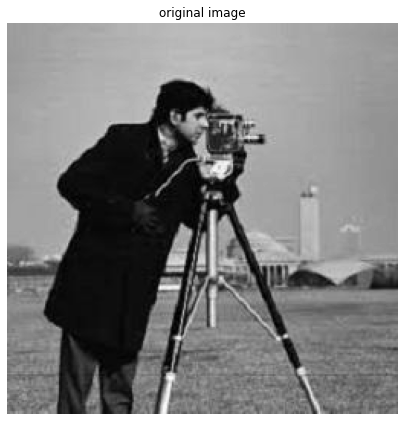

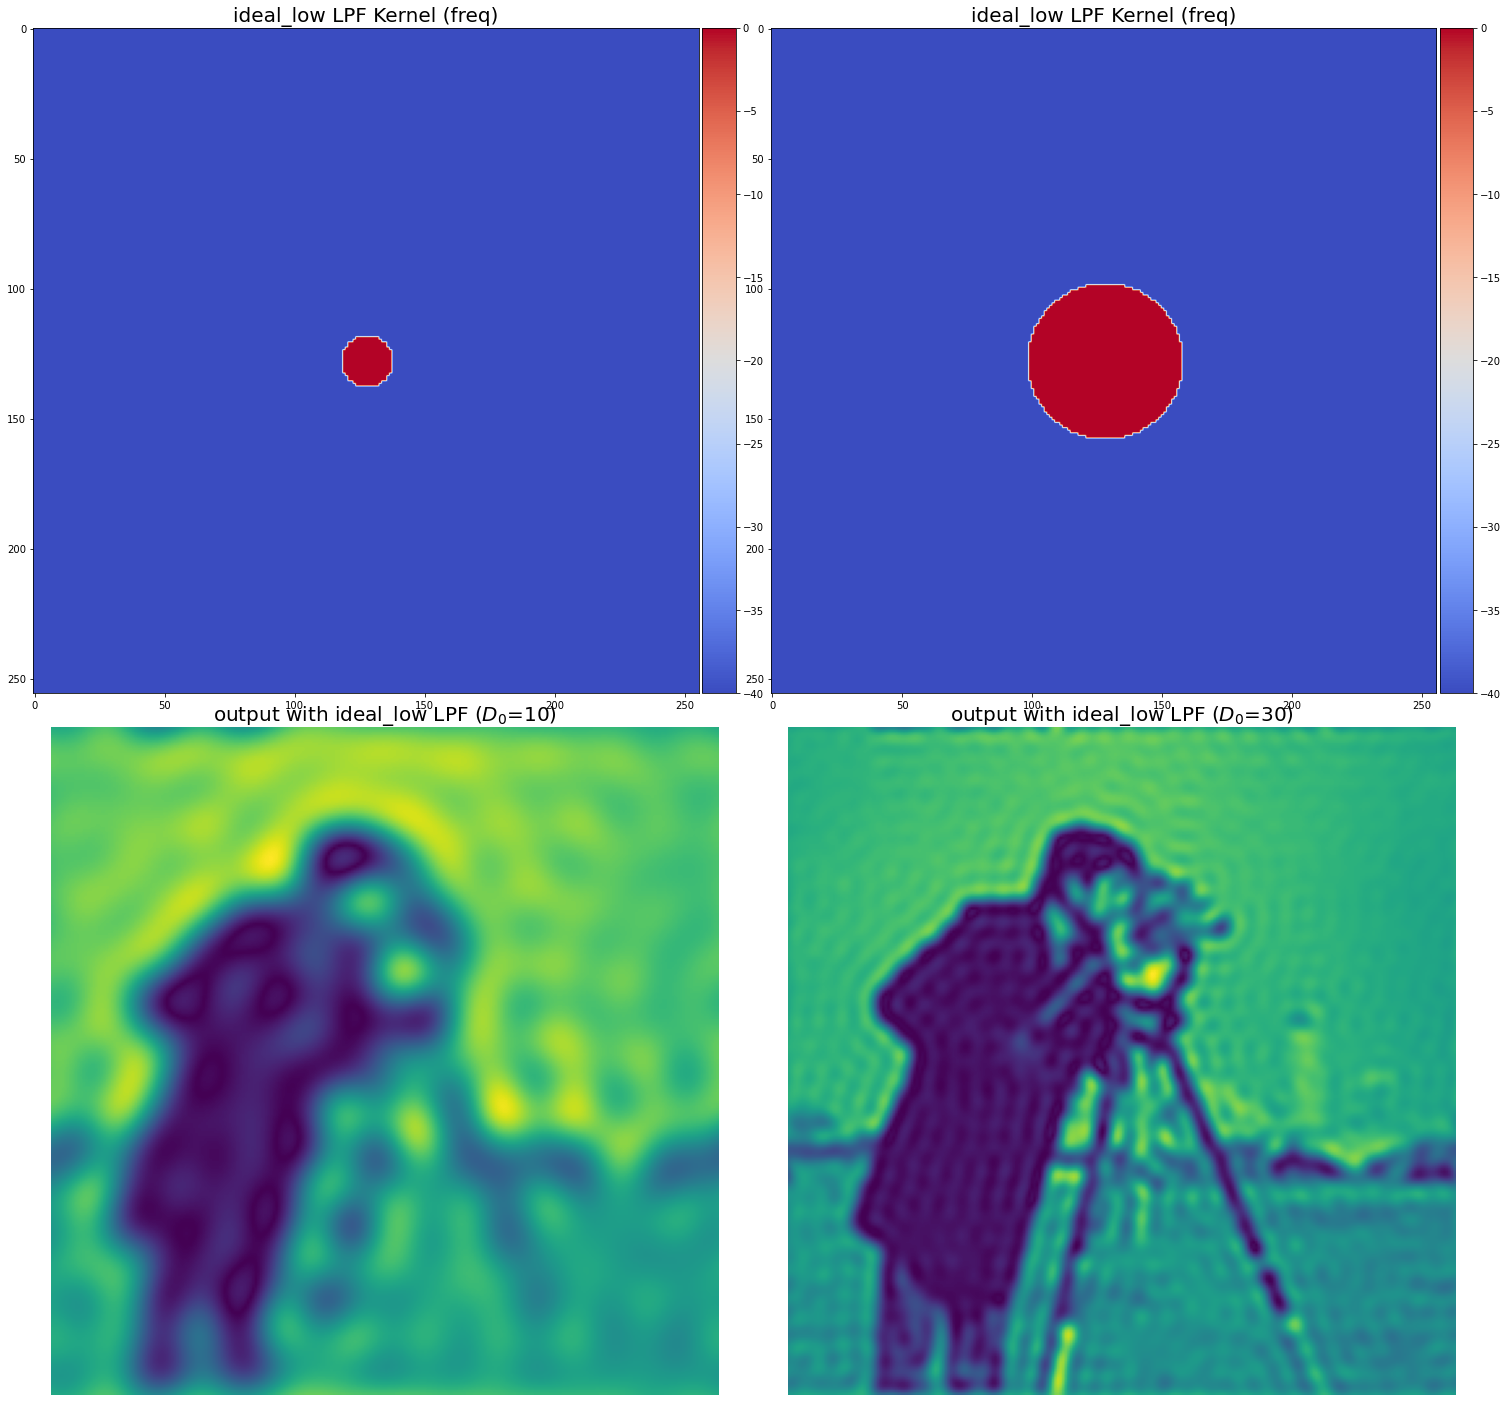

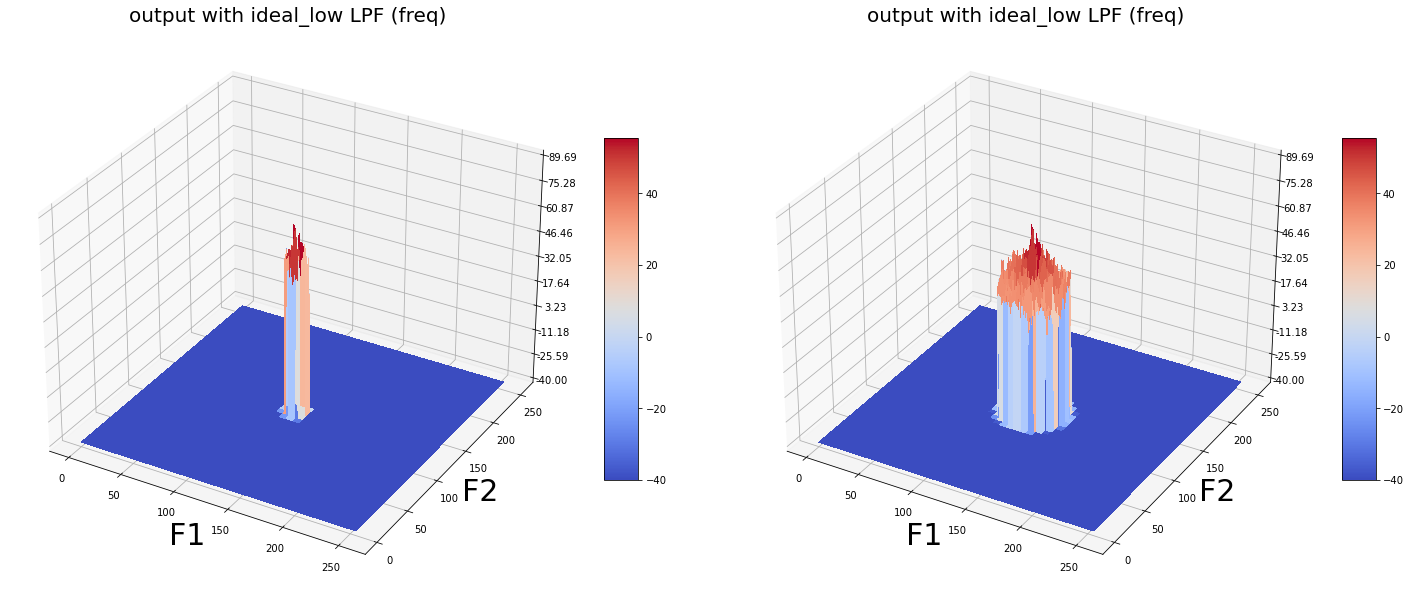

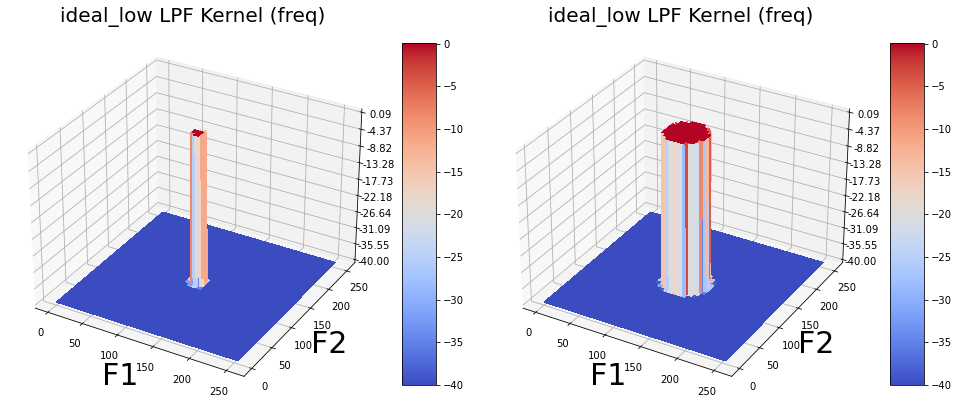

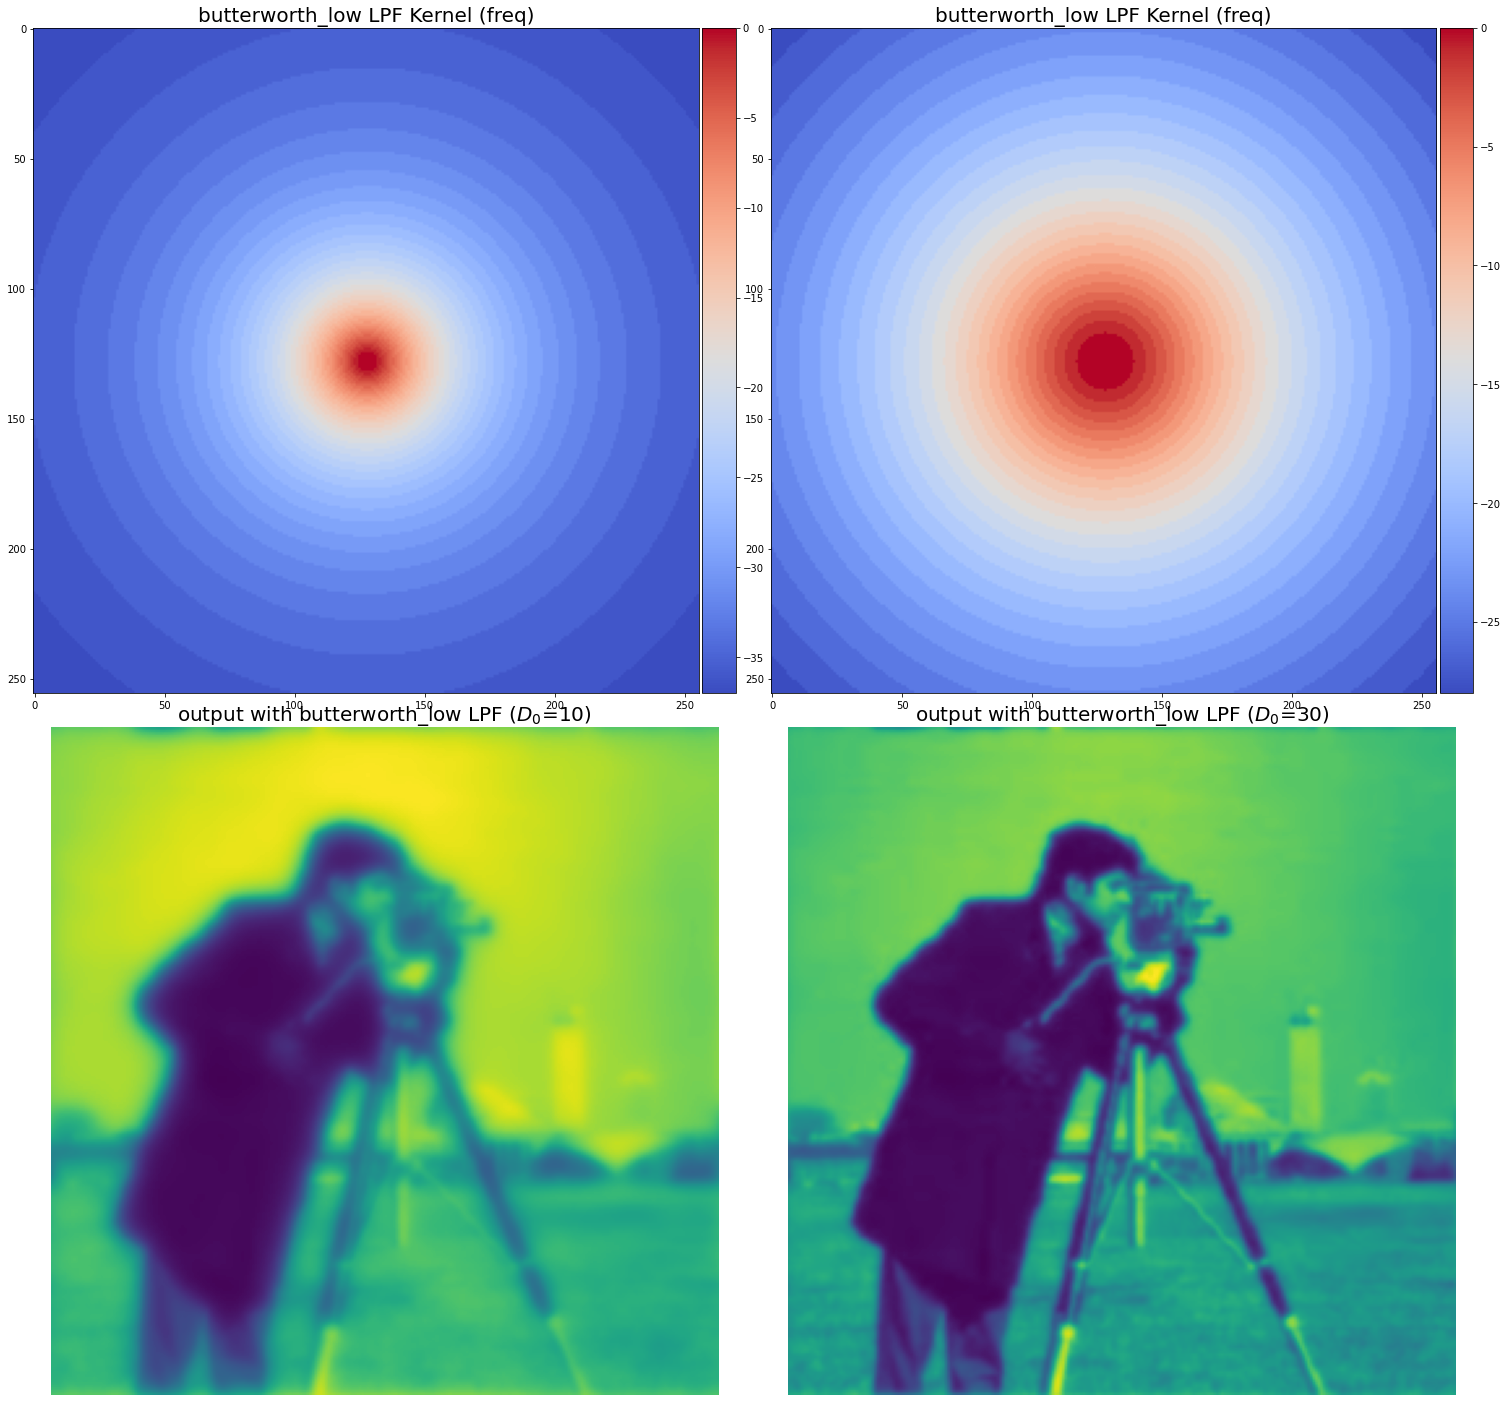

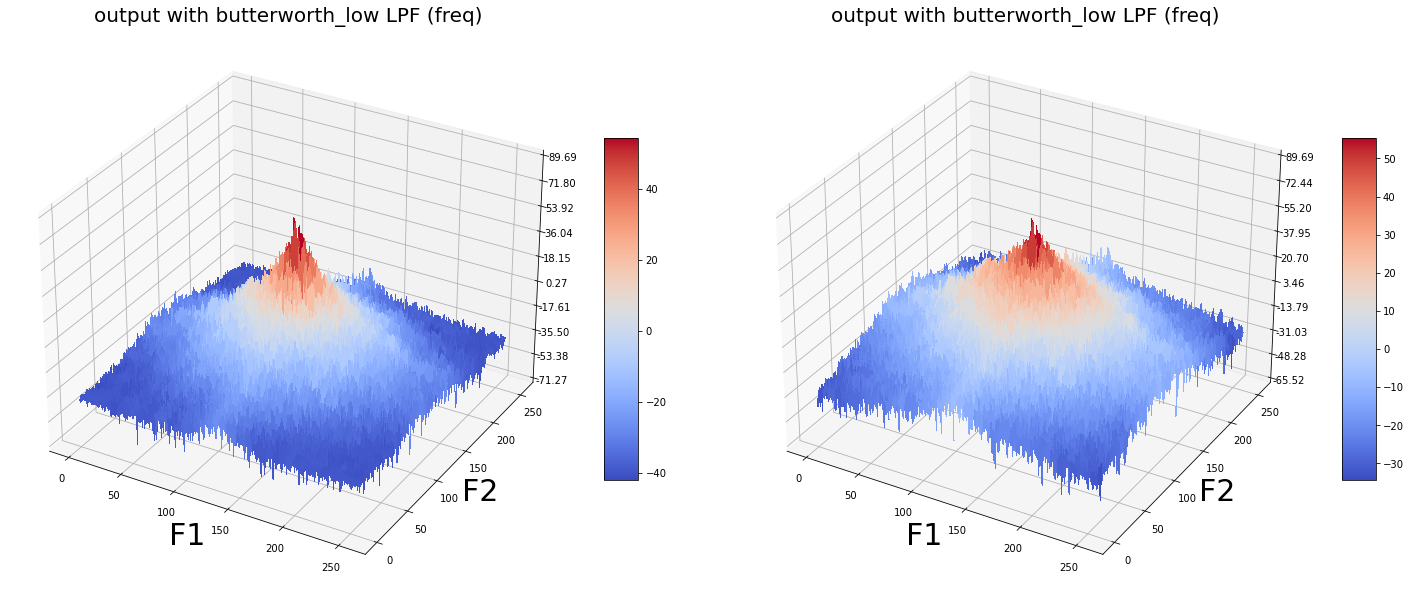

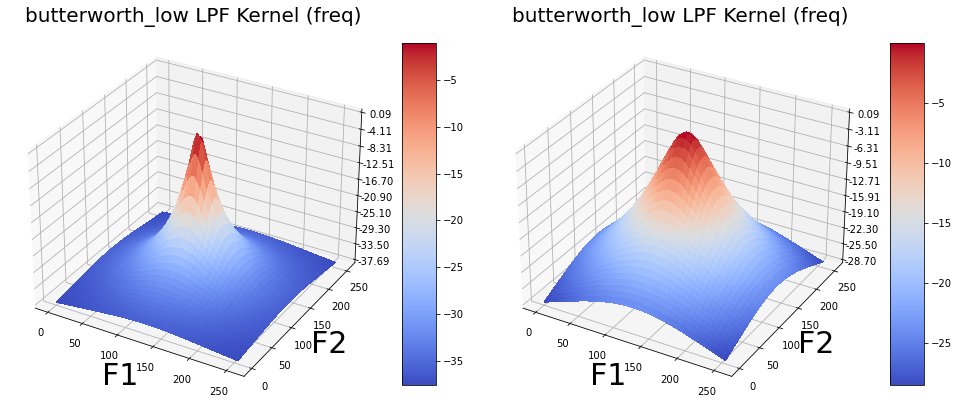

In [73]:
im = plt.imread('Img_03_12.png')
im = rgb2gray(im)
plt.figure(figsize=(7,12))
plt.imshow(im, cmap='gray'), plt.axis('off'), plt.title('original image')
plt.show()

D0 = [10, 30]

plot_LPF(im, ideal_low, D0)
plot_LPF_3d(im, ideal_low, D0)
plot_filter_3d(im.shape, ideal_low, D0)


plot_LPF(im, butterworth_low, D0)
plot_LPF_3d(im, butterworth_low, D0)
plot_filter_3d(im.shape, butterworth_low, D0)


# Q 3-7

In [143]:
def dft2(im):
    
    freq = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
    freq_shift = np.fft.fftshift(freq)
    mag, phase = freq_shift[:,:,0], freq_shift[:,:,1]

    return mag + 1j*phase

def idft2(freq):
    
    real, imag = freq.real, freq.imag
    back = cv2.merge([real, imag]) 
    back_ishift = np.fft.ifftshift(back)
    im = cv2.idft(back_ishift, flags=cv2.DFT_SCALE)
    im = cv2.magnitude(im[:,:,0], im[:,:,1])

    return im

def ideal(sz, D0):
    h, w = sz
    u, v = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) #, sparse=True)
    return np.sqrt(u**2 + v**2) > D0
    
def gaussian(sz, D0):
    h, w = sz
    u, v = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) #, sparse=True)
    return 1-np.exp(-(u**2 + v**2)/(2*D0**2)) 

def butterworth(sz, D0, n=1):
    h, w = sz
    u, v = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) #, sparse=True)
    return 1 / (1 + (D0/(0.01+np.sqrt(u**2 + v**2)))**(2*n))

def laplacian_high(sz, D0):
    h, w = sz
    u, v = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) #, sparse=True)
    return -(u**2 + v**2)

def plot_HPF(im, f, D0s):
    freq = dft2(im) 
    fig = plt.figure(figsize=(20,20))
    plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
    i = 1
    for D0 in D0s:
        freq_kernel = f(im.shape, D0) 
        convolved = freq*freq_kernel # by the Convolution theorem
        
        # freq_kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
        # convolved = freq*kernel # by the Convolution theorem

        im_convolved = idft2(convolved).real 
        im_convolved = (255 * im_convolved / np.max(im_convolved)).astype(np.uint8)
        plt.subplot(2,2,i)
        last_axes = plt.gca()
        img = plt.imshow((freq_kernel).astype(int), cmap='coolwarm')
        # img = plt.imshow((20*np.log10(0.01 + kernel)).astype(int), cmap='coolwarm')

        divider = make_axes_locatable(img.axes)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img, cax=cax)
        plt.sca(last_axes), plt.title('{} HPF Kernel (freq)'.format(f.__name__), size=20)
        plt.subplot(2,2,i+2), plt.imshow(im_convolved), plt.axis('off')
        plt.title(r'output with {} HPF ($D_0$={})'.format(f.__name__, D0), size=20)
        i += 1
    plt.show()

def plot_HPF_3d(im, f, D0s):
    freq = dft2(im) 
    fig = plt.figure(figsize=(20,10))
    plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
    i = 1
    for D0 in D0s:
        freq_kernel = f(im.shape, D0) 
        convolved = freq*freq_kernel # by the Convolution theorem
        Y = np.arange(freq_kernel.shape[0]) 
        X = np.arange(freq_kernel.shape[1]) 
        X, Y = np.meshgrid(X, Y)
        Z = (20*np.log10( 0.01 + convolved)).real
        ax = fig.add_subplot(1, 2, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
        ax.zaxis.set_major_locator(LinearLocator(10)), ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        ax.set_xlabel('F1', size=30), ax.set_ylabel('F2', size=30)
        plt.title(r'output with {} HPF (freq)'.format(f.__name__, D0), size=20)
        fig.colorbar(surf, shrink=0.5, aspect=10)
        i += 1
    plt.show()

def plot_filter_3d(sz, f, D0s, cmap=plt.cm.coolwarm):
    fig = plt.figure(figsize=(20,10))
    plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
    i = 1
    for D0 in D0s:
        freq_kernel = f(sz, D0) 
        Y = np.arange(freq_kernel.shape[0])
        X = np.arange(freq_kernel.shape[1])
        X, Y = np.meshgrid(X, Y)
        Z = (freq_kernel).real
        ax = fig.add_subplot(1, 3, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        ax.set_xlabel('F1', size=30)
        ax.set_ylabel('F2', size=30)
        ax.set_title('{} HPF Kernel (freq)'.format(f.__name__), size=20)
        fig.colorbar(surf, shrink=0.5, aspect=10)
        i += 1

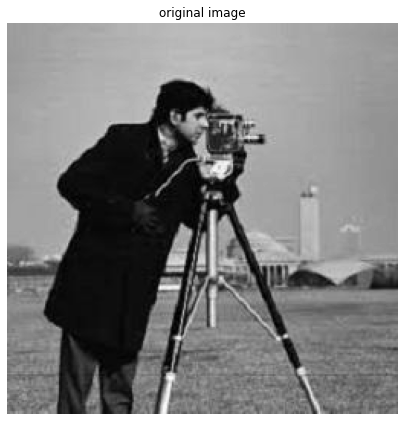

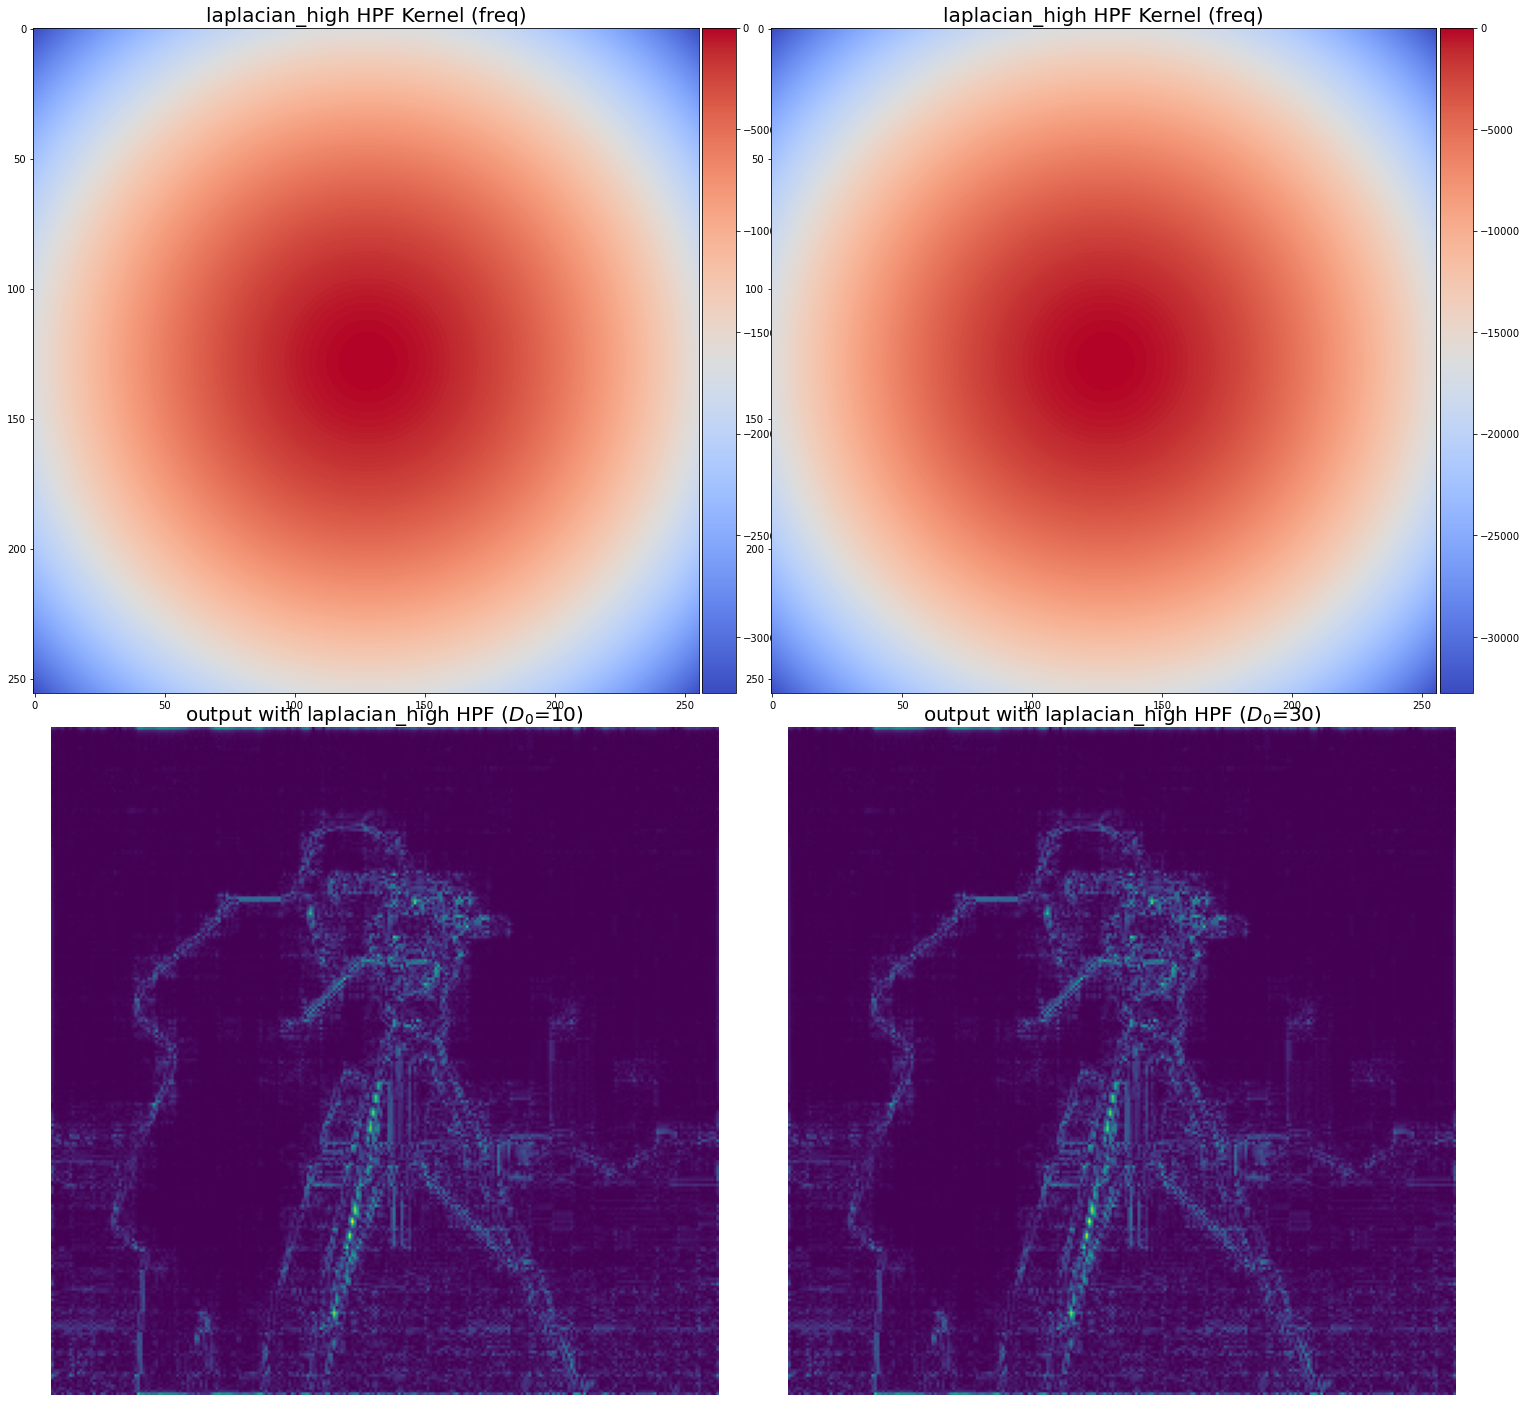

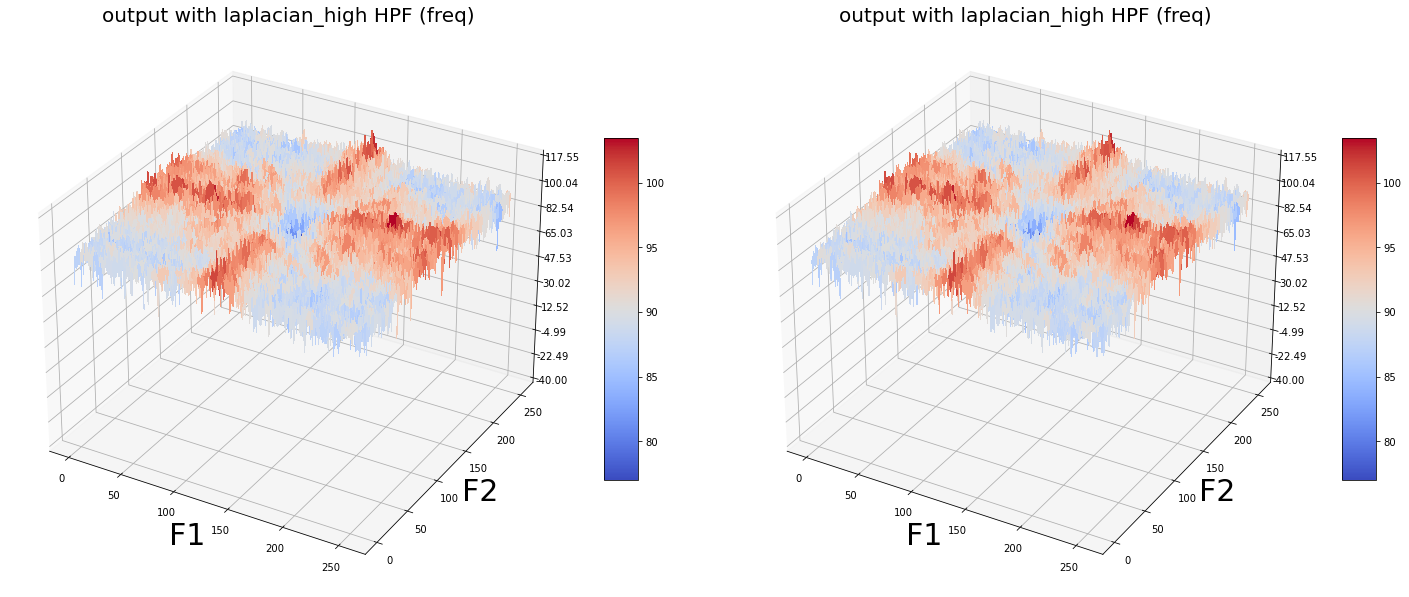

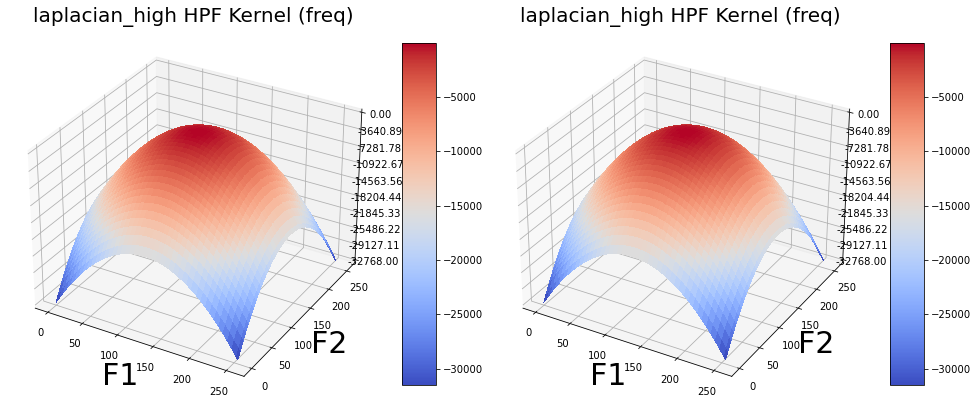

In [142]:
im = plt.imread('Img_03_12.png')
im = rgb2gray(im)
plt.figure(figsize=(7,12))
plt.imshow(im, cmap='gray'), plt.axis('off'), plt.title('original image')
plt.show()

D0 = [10, 30]

plot_HPF(im, laplacian_high, D0)

plot_HPF_3d(im, laplacian_high, D0)

plot_filter_3d(im.shape, laplacian_high, D0)


# Q 4-1

In [1]:
get_ipython().run_line_magic('matplotlib', 'inline') # 이게 뭘까
import scipy.fftpack as fp
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from skimage.draw import rectangle_perimeter
import numpy as np
import matplotlib.pylab as plt
# import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import cv2

In [2]:
def plot_3d(X, Y, Z, cmap=plt.cm.seismic):
    fig = plt.figure(figsize=(20,20))
    ax = fig.gca(projection='3d')
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=5, antialiased=False)
    #ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
    #ax.set_zscale("log", nonposx='clip')
    #ax.zaxis.set_scale('log')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('F1', size=30)
    ax.set_ylabel('F2', size=30)
    ax.set_zlabel('Freq Response', size=30)
    #ax.set_zlim((-40,10))
    # Add a color bar which maps values to colors.
    fig.colorbar(surf) #, shrink=0.15, aspect=10)
    #plt.title('Frequency Response of the Gaussian Kernel')
    plt.show()    

In [3]:
im = 255*rgb2gray(imread('Img_03_40.png')[:,:,0:3])
im_tm = 255*rgb2gray(imread('Img_03_41.png')[:,:,0:3])

F = fp.fftn(im)
F_tm = fp.fftn(im_tm, shape=im.shape)

F_cc = F * np.conj(F_tm)
c = (fp.ifftn(F_cc/np.abs(F_cc))).real
i, j = np.unravel_index(c.argmax(), c.shape)
print(c.size)

c_color = gray2rgb(c)
im2 = (gray2rgb(im)).astype(np.uint8)
rr, cc = rectangle_perimeter((i,j), end=(i + im_tm.shape[0], j + im_tm.shape[1]), shape=im.shape)
for x in range(-2,2):
    for y in range(-2,2):
        im2[rr + x, cc + y] = (255,0,0)

230400


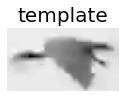

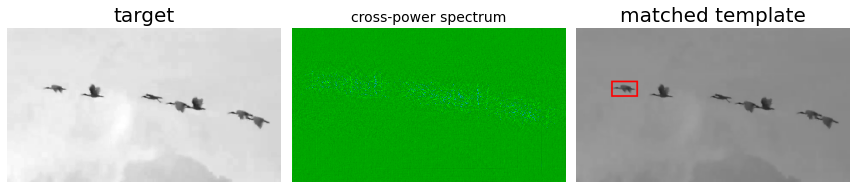

In [5]:
# from pylab import rcParams
plt.figure(figsize=(2,3))
# mpl.rcParams['text.usetex'] = True
plt.gray()
plt.imshow(im_tm), plt.title('template', size=20), plt.axis('off')
plt.show()
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,7))
ax[0].imshow(im), ax[0].set_title('target', size=20)
ax[1].imshow(c,cmap='nipy_spectral'), ax[1].set_title('cross-power spectrum', size=14)
ax[2].imshow(im2), ax[2].set_title('matched template', size=20)

for a in ax.ravel():
    a.set_axis_off()
plt.tight_layout()
plt.show()

# Q 4-2

In [107]:
import SimpleITK as sitk
from scipy import signal
import SimpleITK as sitk
from skimage import restoration
from skimage.metrics import peak_signal_noise_ratio

# im = rgb2gray(imread('images/Chapter 04/images/img_04_07.png'))
im = rgb2gray(cv2.imread('Img_04_07.png',cv2.IMREAD_COLOR))

def get_out_of_focus_kernel(r, sz=15):
    kern = np.zeros((sz, sz), np.uint8)
    cv2.circle(kern, (sz, sz), r, 255, -1, cv2.LINE_AA, shift=1)
    kern = np.float32(kern) / 255
    return kern

psf = get_out_of_focus_kernel(7, 9).astype(np.float) 
im_blur = signal.convolve2d(im, psf, 'same')
im_blur = im_blur / np.max(im_blur)


def Tikhonov(num):
    arr = []
    if num == 1:
        t1 = np.arange(0.0, 0.01, 0.0001)
    elif num == 2:
        t1 = np.arange(0.0, 0.01, 0.00005)
    for constant in t1:
        tkfilter = sitk.TikhonovDeconvolutionImageFilter() 
        tkfilter.SetRegularizationConstant(constant) #0.06)
        tkfilter.SetNormalize(True)
        arr.append(peak_signal_noise_ratio(im,sitk.GetArrayFromImage(tkfilter.Execute (sitk.GetImageFromArray(im_blur), sitk.GetImageFromArray(psf)))))
            
    return arr

/var/folders/9v/jr20lh896vggl5_25dthcsw80000gn/T/ipykernel_1277/2891589848.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  psf = get_out_of_focus_kernel(7, 9).astype(np.float)


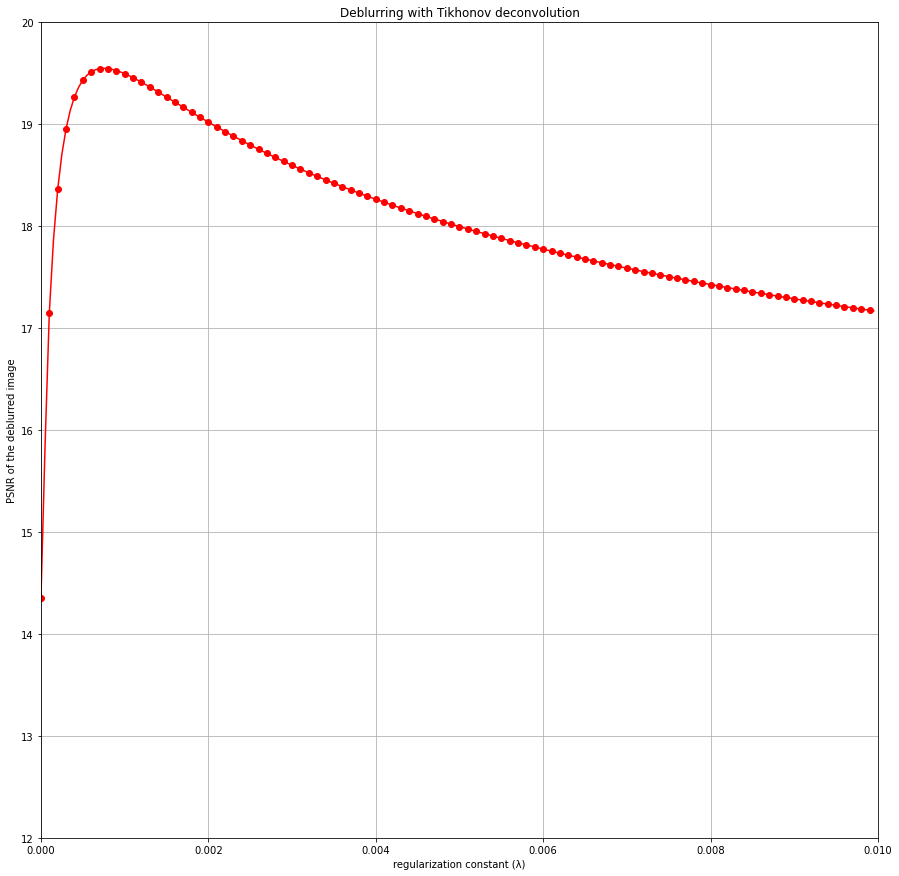

In [122]:
plt.figure(figsize=(15, 15))
plt.axis([0, 0.01, 12, 20])
plt.grid(True)
plt.ylabel('PSNR of the deblurred image')
plt.xlabel('regularization constant (λ)')
plt.title('Deblurring with Tikhonov deconvolution')
t1 = np.arange(0.0, 0.01, 0.0001)
t2 = np.arange(0.0, 0.01, 0.00005)

plt.plot(t1, Tikhonov(1), 'ro' ,t2, Tikhonov(2), 'r')
# plt.subplot(614), plt.plot(t1, peak_signal_noise_ratio(im, Tikhonov(0.008)), 'bo')

plt.show()